In [82]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from load_results import *
from plotting_utils import *
from scipy.stats import pearsonr
import math
import re
from matplotlib.lines import Line2D

In [83]:
plot_pilot_results = False
plot_needs_citation = True
plot_auto_eval_results = True

datasets = ['NQ', 'Eta3G', 'MH', 'MASH']
label_datasets = ['NQ', 'Eta3G', '2WikiMH', 'MASH']
ops = ['Snippet', 'Quoted', 'Paraphrased', 'Entailed', 'Abstractive']
op_names = ['Extractive', 'Quoted', 'Paraphrased', 'Entailed', 'Abstractive']    
all_ops = ['Snippet', 'Quoted', 'Quoted Reeval', 'Paraphrased', 'Entailed', 'Abstractive']

def get_results_for_notebook(model_type):
    results_tag = 'auto_eval_'+model_type
    results_tag = results_tag.replace('.', '')
    all_results_df, results = load_all_auto_eval_results(model_type, baselines=True)
    return all_results_df, results

In [84]:
gpt4_all_results_df, gpt4_results = get_results_for_notebook('gpt4')
gpt5_all_results_df, gpt5_results = get_results_for_notebook('gpt5')
sonnet45_all_results_df, sonnet45_results = get_results_for_notebook('sonnet4.5')
results_tag = 'auto_eval_reasoning'

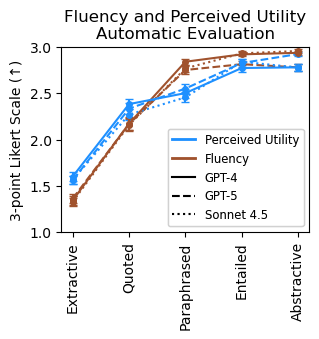

[([1.598793363499246, 2.383107088989442, 2.502262443438914, 2.773755656108597, 2.7812971342383106], [0.045572200125493546, 0.054446756362039446, 0.04859015754775839, 0.04057162424480436, 0.03780485351480989])]


In [85]:
# Plot Utility and Fluency in aggregate
results_labels = datasets

# Initialize the plot
fig, ax1 = plt.subplots()
fig.set_size_inches([3.2, 2.4])
def plot_utility_or_fluency(results_list, results_labels, fig, ax1, colors, model_type):    
    # Plot the first set of results
    lines, labels = ax1.get_legend_handles_labels()
    for idx, nested_tuple in enumerate(zip(results_list, results_labels)):
        result_label = nested_tuple[1]
        averages = nested_tuple[0][0]
        conf_intervals = nested_tuple[0][1]
        marker = 'o'
        if model_type == 'GPT-5':
            line_style = '--'
        elif model_type == 'Sonnet 4.5':
            line_style = ':'
        elif model_type == 'GPT-4':
            line_style = '-'
        if 'Gemini' in op_names:
            ax1.errorbar(op_names[:-1], averages[:-1], yerr=conf_intervals[:-1], fmt=marker + line_style, color=colors[idx], label=result_label, capsize=3, ms=4)
            ax1.errorbar(op_names[-1], averages[-1], yerr=conf_intervals[-1], fmt=marker + line_style, color=colors[idx], capsize=3, ms=4)
        else:
            ax1.errorbar(op_names, averages, yerr=conf_intervals, fmt=marker + line_style, color=colors[idx], label=f'{model_type} {result_label}', capsize=3, ms=4)
        ax1.set_ylim([1,3])
    plt.xticks(rotation=90)
    return fig, ax1

utilities = [get_avg_fluency_or_utility_by_op(gpt5_all_results_df, 'human_utility_rating', ops)]
fluencies = [get_avg_fluency_or_utility_by_op(gpt5_all_results_df, 'human_fluency_rating', ops)]
fig, ax1 = plot_utility_or_fluency(fluencies, ['Fluency'], fig, ax1, colors=['sienna'], model_type='GPT-5')
fig, ax1 = plot_utility_or_fluency(utilities, ['Perceived Utility'], fig, ax1, colors=['dodgerblue'], model_type='GPT-5')

utilities = [get_avg_fluency_or_utility_by_op(sonnet45_all_results_df, 'human_utility_rating', ops)]
fluencies = [get_avg_fluency_or_utility_by_op(sonnet45_all_results_df, 'human_fluency_rating', ops)]
fig, ax1 = plot_utility_or_fluency(fluencies, ['Fluency'], fig, ax1, colors=['sienna'], model_type='Sonnet 4.5')
fig, ax1 = plot_utility_or_fluency(utilities, ['Perceived Utility'], fig, ax1, colors=['dodgerblue'], model_type='Sonnet 4.5')

utilities = [get_avg_fluency_or_utility_by_op(gpt4_all_results_df, 'human_utility_rating', ops)]
fluencies = [get_avg_fluency_or_utility_by_op(gpt4_all_results_df, 'human_fluency_rating', ops)]
fig, ax1 = plot_utility_or_fluency(fluencies, ['Fluency'], fig, ax1, colors=['sienna'], model_type='GPT-4')
fig, ax1 = plot_utility_or_fluency(utilities, ['Perceived Utility'], fig, ax1, colors=['dodgerblue'], model_type='GPT-4')
    
# Set labels and title
ax1.set_ylabel('3-point Likert Scale (↑)')

# set the legend
color_legend = [
    Line2D([0], [0], color='dodgerblue',  linewidth=2, label='Perceived Utility'),
    Line2D([0], [0], color='sienna', linewidth=2, label='Fluency'),
    Line2D([0], [0], color='black', linestyle='-',  linewidth=1.5, label='GPT-4'),
    Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label='GPT-5'),
    Line2D([0], [0], color='black', linestyle=':',  linewidth=1.5, label='Sonnet 4.5'),
]

legend1 = ax1.legend(handles=color_legend, loc="lower right", fontsize='small', title_fontsize='small')
ax1.add_artist(legend1)

if (plot_pilot_results):
    plt.title('Pilot Fluency and Perceived Utility')
elif (plot_auto_eval_results):
    plt.title('Fluency and Perceived Utility\nAutomatic Evaluation')
else:
    plt.title('Fluency and Perceived Utility')


plt.savefig('figures/utility_fluency_aggregate_'+results_tag, bbox_inches='tight', dpi=400)
# Show the plot
plt.show()
print(utilities)

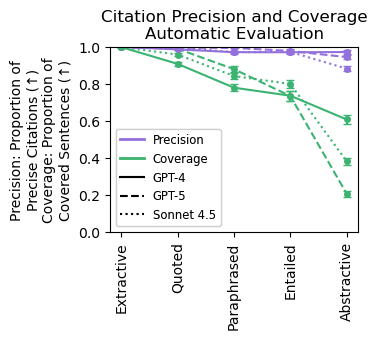

In [86]:
# Initialize the plot
fig, ax1 = plt.subplots()
fig.set_size_inches([3.2, 2.4])

precisions = [get_avg_precision_by_op(gpt5_all_results_df, ops[1:])]
coverages = [get_avg_coverage_by_op(gpt5_all_results_df, ops[1:])]
fig, ax1 = plot_utility_or_fluency(precisions, ['Precision'], fig, ax1, colors=['mediumpurple'], model_type='GPT-5')
fig, ax1 = plot_utility_or_fluency(coverages, ['Coverage'], fig, ax1, colors=['mediumseagreen'], model_type='GPT-5')

precisions = [get_avg_precision_by_op(sonnet45_all_results_df, ops[1:])]
coverages = [get_avg_coverage_by_op(sonnet45_all_results_df, ops[1:])]
fig, ax1 = plot_utility_or_fluency(precisions, ['Precision'], fig, ax1, colors=['mediumpurple'], model_type='Sonnet 4.5')
fig, ax1 = plot_utility_or_fluency(coverages, ['Coverage'], fig, ax1, colors=['mediumseagreen'], model_type='Sonnet 4.5')

precisions = [get_avg_precision_by_op(gpt4_all_results_df, ops[1:])]
coverages = [get_avg_coverage_by_op(gpt4_all_results_df, ops[1:])]
fig, ax1 = plot_utility_or_fluency(precisions, ['Precision'], fig, ax1, colors=['mediumpurple'], model_type='GPT-4')
fig, ax1 = plot_utility_or_fluency(coverages, ['Coverage'], fig, ax1, colors=['mediumseagreen'], model_type='GPT-4')

# Set labels and title
ax1.set_ylabel('Precision: Proportion of\nPrecise Citations (↑)\nCoverage: Proportion of\nCovered Sentences (↑)')

# set the legend
color_legend = [
    Line2D([0], [0], color='mediumpurple',  linewidth=2, label='Precision'),
    Line2D([0], [0], color='mediumseagreen', linewidth=2, label='Coverage'),
    Line2D([0], [0], color='black', linestyle='-',  linewidth=1.5, label='GPT-4'),
    Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label='GPT-5'),
    Line2D([0], [0], color='black', linestyle=':',  linewidth=1.5, label='Sonnet 4.5'),
]

legend1 = ax1.legend(handles=color_legend, loc="lower left", fontsize='small', title_fontsize='small')
ax1.add_artist(legend1)

if (plot_pilot_results):
    plt.title('Pilot Citation\nPrecision and Coverage')
elif (plot_auto_eval_results):
    plt.title('Citation Precision and Coverage\nAutomatic Evaluation')
else:
    plt.title('Citation Precision and Coverage')

plt.ylim(0,1)

plt.savefig('figures/precision_coverage_aggregate_'+results_tag, bbox_inches='tight', dpi=400)

# Show the plot
plt.show()